# <b>The Sparks Foundation (Data Science & Business Analyst Internship)</b>
## Shiva Gupta(Student, SRMS CET  BAREILLY)<br/><br/>


#<b>TASK 2 : Prediction using Unsupervised ML</b>

## <b>Importing Libraries</b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## <b>Importing dataset & visualizing first 5 records</b>

In [2]:
iris_data=pd.read_csv("D:\Sparks_Foundation_Internship_Tasks-0c92622b10424b488e169cf35632457014161950/Iris.csv")
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Viewing unique categories/values

In [3]:
unique=iris_data.Species.unique()
print(len(unique))
print(unique)

3
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## <b>Taking required numerical data into another dataframe</b>

In [4]:
iris_df=iris_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] #choosing fetures having numerical data
iris_df.sample(5) #Viewing random 5 records from dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
2,4.7,3.2,1.3,0.2
121,5.6,2.8,4.9,2.0
50,7.0,3.2,4.7,1.4
94,5.6,2.7,4.2,1.3
0,5.1,3.5,1.4,0.2


## <b>Obtaining Description/Summary of dataframe</b>

### Using info() we get to know that there are no null values and data type of numerical values

In [5]:
iris_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## <b>Studying relation between features</b>

### <b>PAIRPLOT</b>

#### From pairplot() we get to know the shape of distribution and relationship between features using scatterplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

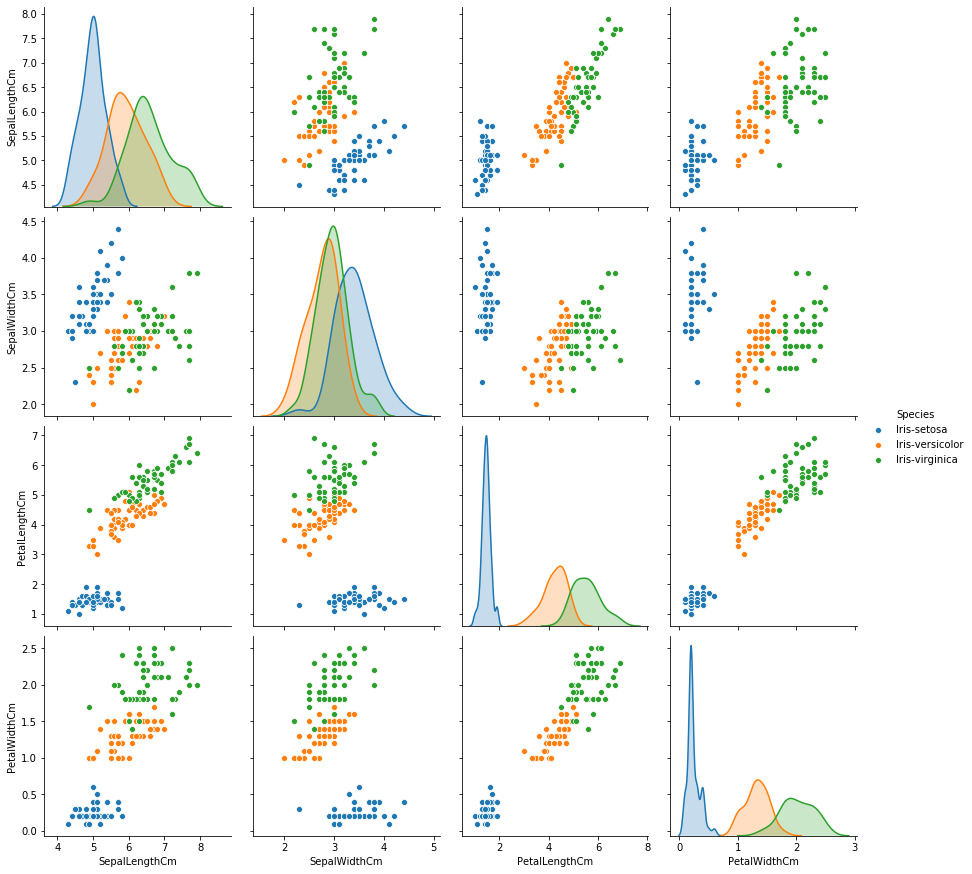

In [7]:
iris_df2=iris_data.drop(['Id'],axis=1)
plt.figure(figsize=(10,10))
sns.pairplot(iris_df2,hue='Species',size=3)

## From the above pairplot it shows that features of Iris-Setosa are distinguishable from features of other categories

### <b>HEAT MAP</b>

Heat Map allows you to visualize how strongly/weakly or positively/negatively the features are correlated with light to dark colors & value of correlation coefficients

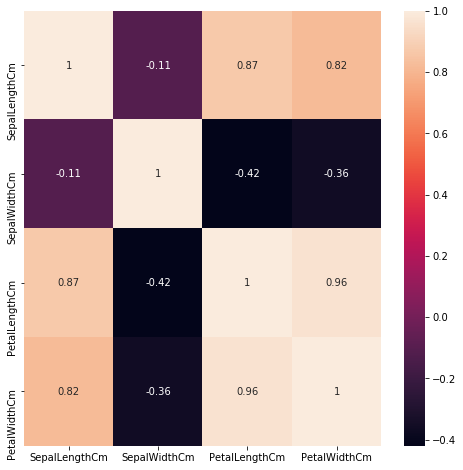

In [8]:
plt.figure(figsize=(8,8))
correlation=iris_df2.corr() #To check correaltion
sns.heatmap(correlation,annot=True) #to visualize the how strong/weak correlation exists & annot=True to show correlation value

### <b>BOXPLOT</b>

#### Boxplot allows us to know the median, Quartiles and presence of outliers

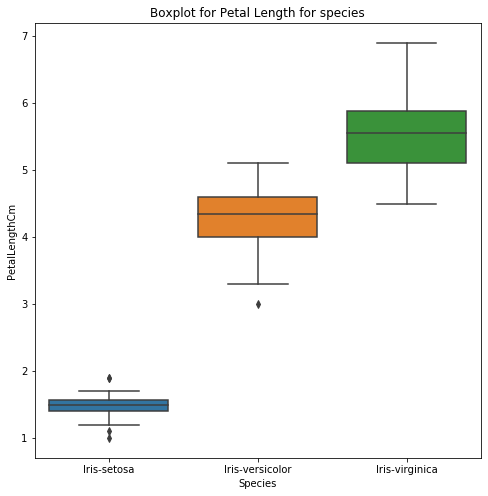

In [9]:
plt.figure(figsize=(8,8))
plt.title("Boxplot for Petal Length for species")
sns.boxplot(y='PetalLengthCm',x='Species',data=iris_df2)

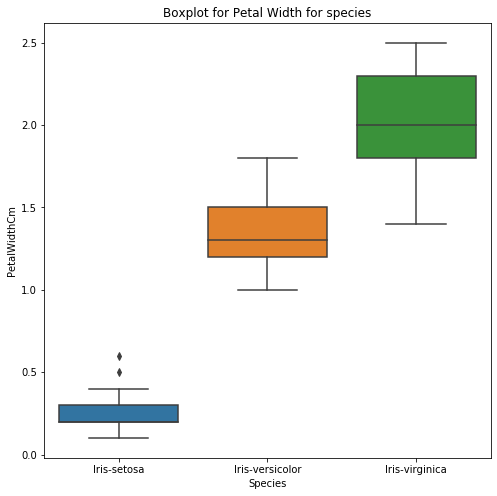

In [10]:
plt.figure(figsize=(8,8))
plt.title("Boxplot for Petal Width for species")
sns.boxplot(y='PetalWidthCm',x='Species',data=iris_df2)

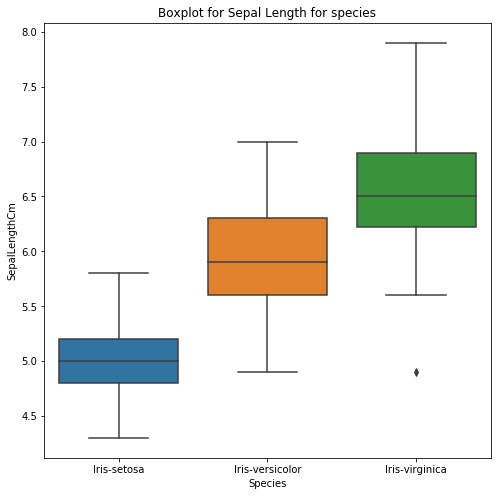

In [11]:
plt.figure(figsize=(8,8))
plt.title("Boxplot for Sepal Length for species")
sns.boxplot(y='SepalLengthCm',x='Species',data=iris_df2)

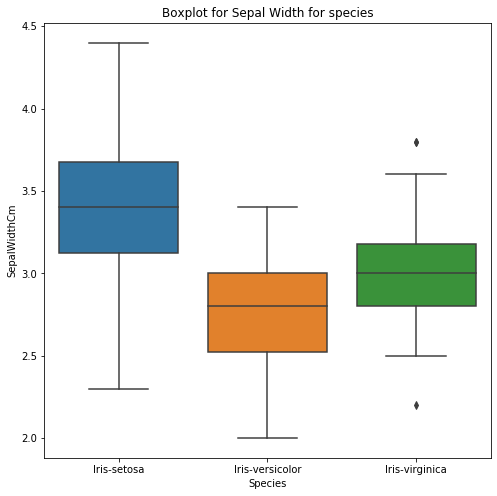

In [12]:
plt.figure(figsize=(8,8))
plt.title("Boxplot for Sepal Width for species")
sns.boxplot(y='SepalWidthCm',x='Species',data=iris_df2)

#### From the above plots we get to see that outliers are present 

### <b>VIOLIN PLOT</b>

#### Violin Plot shows the probability density of the data along with the information shown by boxplot

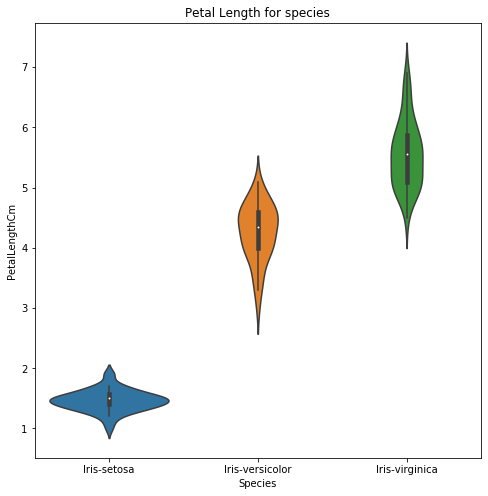

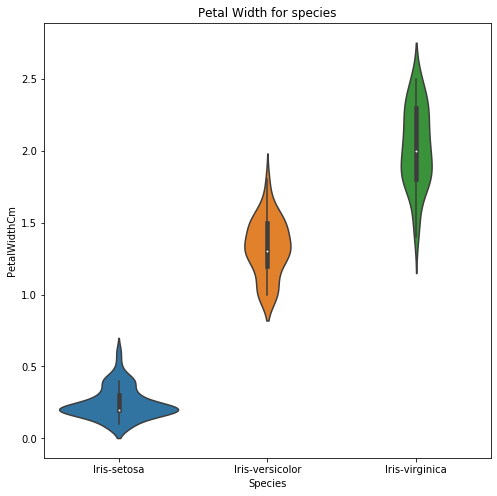

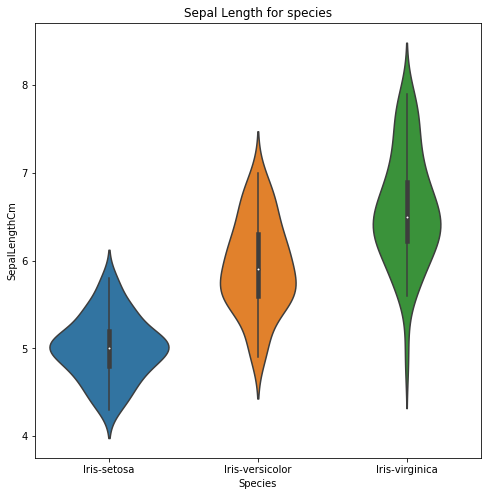

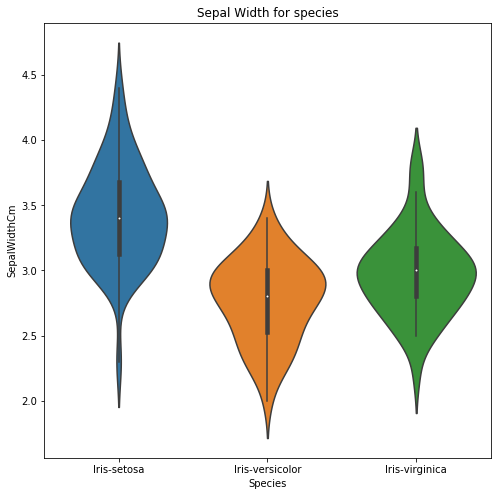

In [13]:
plt.figure(figsize=(8,8))
plt.title("Petal Length for species")
sns.violinplot(y='PetalLengthCm',x='Species',data=iris_df2)
plt.show()

plt.figure(figsize=(8,8))
plt.title("Petal Width for species")
sns.violinplot(y='PetalWidthCm',x='Species',data=iris_df2)
plt.show()

plt.figure(figsize=(8,8))
plt.title("Sepal Length for species")
sns.violinplot(y='SepalLengthCm',x='Species',data=iris_df2)
plt.show()

plt.figure(figsize=(8,8))
plt.title("Sepal Width for species")
sns.violinplot(y='SepalWidthCm',x='Species',data=iris_df2)

## <b>Splitting of data into train & test sets</b>

In [14]:
from sklearn.model_selection import train_test_split

X,y= iris_df2.iloc[:,:-1],iris_df2.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) #divinding at 80-20 ratio

In [15]:
[len(X_train),len(X_test),len(y_train),len(y_test)]

[120, 30, 120, 30]

## <b>Using K Means of Clustering</b>

### <b>Elbow method to find the optimum no. of clusters

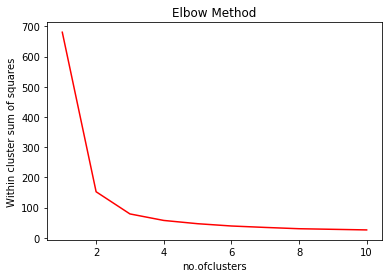

In [16]:
from sklearn.cluster import KMeans
css = []
x = iris_df.iloc[:, [0, 1, 2, 3]].values
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    css.append(kmeans.inertia_)

plt.plot(range(1, 11),css,color='red')
plt.title('Elbow Method')
plt.xlabel('no.ofclusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

#### Building KNN Classifier 

In [17]:
from sklearn.neighbors import KNeighborsClassifier

k = 3 #From above elbow method we derived optimal no.of clusters to be 3
kclassifier = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
kclassifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

#### Putting predictions & Actual data in dataframe

In [18]:
y_pred=kclassifier.predict(X_test)
compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
compare_df.sample(10)

,Actual,Predicted
44,Iris-setosa,Iris-setosa
37,Iris-setosa,Iris-setosa
54,Iris-versicolor,Iris-versicolor
33,Iris-setosa,Iris-setosa
22,Iris-setosa,Iris-setosa
51,Iris-versicolor,Iris-versicolor
86,Iris-versicolor,Iris-versicolor
93,Iris-versicolor,Iris-versicolor
63,Iris-versicolor,Iris-virginica
73,Iris-versicolor,Iris-versicolor


#### No.of Results wrongly predicted by classifier

In [19]:
cnt=0
index=[]
for i,j in zip(compare_df['Actual'],compare_df['Predicted']):
  if(i!=j):
    cnt+=1
print(cnt)

1


### <b>Evaluate K Classifier Model</b>

In [20]:
from sklearn.metrics import accuracy_score

print("Train set Accuracy: ",accuracy_score(y_train, kclassifier.predict(X_train)))
print("Test set Accuracy: ",accuracy_score(y_test, y_pred))

Train set Accuracy:  0.95
Test set Accuracy:  0.9666666666666667


#### <b>Confusion Matrix for the classifier</b>
#### From the confusion matrix we get to know that there are some false positives present

In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


#### <b>Classification Report</b>
#### Gives a report for Precision & Recall for each category along with F1 scores

In [22]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



## <b>Using SVM Approach</b>

#### Building SVM Classifier

In [23]:
from sklearn.svm import SVC
SVC_classifier=SVC()
SVC_classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Putting predictions & Actual data in dataframe

In [24]:
y_pred2=SVC_classifier.predict(X_test)
compare_df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
compare_df2.sample(10)

,Actual,Predicted
26,Iris-setosa,Iris-setosa
134,Iris-virginica,Iris-virginica
33,Iris-setosa,Iris-setosa
97,Iris-versicolor,Iris-versicolor
121,Iris-virginica,Iris-virginica
86,Iris-versicolor,Iris-versicolor
45,Iris-setosa,Iris-setosa
51,Iris-versicolor,Iris-versicolor
73,Iris-versicolor,Iris-versicolor
107,Iris-virginica,Iris-virginica


#### No.of Results wrongly predicted by classifier

In [25]:
cnt=0
index=[]
for i,j in zip(compare_df2['Actual'],compare_df2['Predicted']):
  if(i!=j):
    cnt+=1
print(cnt)

1


### <b>Evaluate SVC Classifier</b>

In [26]:
print("Train set Accuracy: ",accuracy_score(y_train, SVC_classifier.predict(X_train)))
print("Test set Accuracy: ",accuracy_score(y_test, y_pred2))

Train set Accuracy:  0.9583333333333334
Test set Accuracy:  1.0


#### <b>Confusion Matrix for the classifier</>
#### From the confusion matrix we get to know that there are no any false positives & false negatives present

In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred2))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


#### <b>Classification Report</b>

In [28]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred2)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# <b>Conclusion:</b>
## SVM performed better than KNN Classifier